# Case Study 1: From Exploration to Design

- Name: Oscar Cheng
- Student ID: 41027079
- Link to GitHub Repository: https://github.com/Oscarcheng0312/DSCI200-CaseStudy-1

This blank notebook is provided for you to use to answer questions from [Case Study 1](https://ubc-dsci.github.io/dsci-200/case-studies/case-study-1.html). 

In [1]:
install.packages('tidyverse')
devtools::install_github("lbelzile/hecedsm")
library(tidyverse)
library(hecedsm)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Skipping install of 'hecedsm' from a github remote, the SHA1 (df0a5444) has not changed since last install.
  Use `force = TRUE` to force installation

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘hecedsm’


The following object is masked from ‘package:stringr’:

    words




# Task 1

I chose the first study Virtual communication curbs creative idea generation.

In [2]:
data("BL22_E", package = "hecedsm")
head(BL22_E)

id,writer,cond,partner_time,task_time,room_time
<fct>,<lgl>,<fct>,<dbl>,<dbl>,<dbl>
1,TRUE,video,84.626,193.868,20.026
1,FALSE,video,122.026,144.806,33.150
2,TRUE,video,86.122,125.630,88.740
2,FALSE,video,89.828,116.518,93.500
3,FALSE,f2f,1.632,255.816,41.480
4,FALSE,video,118.694,160.956,17.578


## Summary of the study
This study investigates how the shift from in-person to virtual interaction affects collaborative idea generation and selection. This research is highly relevant given the widespread normalization of remote work following the COVID-19 pandemic and the critical role collaborative innovation plays in scientific and commercial progress.

The authors aim to test whether the physical nature of videoconferencing—specifically the focus on a bounded screen—creates a cognitive cost for creativity. Their primary hypothesis is that virtual interaction narrows visual focus, which subsequently narrows cognitive focus and constrains the associative thinking necessary for generating novel ideas. The study concludes that while videoconferencing significantly inhibits the generation of creative ideas compared to in-person interaction, it does not hinder (and may arguably improve) the analytical task of selecting which ideas to pursue.

# Task 2: Explore data

In [3]:
glimpse(BL22_E)

Rows: 270
Columns: 6
$ id           <fct> 1, 1, 2, 2, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10…
$ writer       <lgl> TRUE, FALSE, TRUE, FALSE, FALSE, FALSE, TRUE, TRUE, FALSE…
$ cond         <fct> video, video, video, video, f2f, video, video, video, vid…
$ partner_time <dbl> 84.626, 122.026, 86.122, 89.828, 1.632, 118.694, 24.684, …
$ task_time    <dbl> 193.868, 144.806, 125.630, 116.518, 255.816, 160.956, 245…
$ room_time    <dbl> 20.026, 33.150, 88.740, 93.500, 41.480, 17.578, 21.828, 3…


3. There are 270 observations and 6 variables in the data set.

4. Variables type:
Numerical: partner_time, task_time, room_time. (Representing duration in seconds). Categorical: id, cond, writer. (id is an identifier, cond is the experiment group, writer is a binary status).

5. No, because from the glimpse of the data, we can find that those variables have already been marked with the correct type, like id, cond, are <fct>, others have been marked as <lgl>, <dbl> separately. So, this format is appropriate for the analysis functions in R."


In [4]:
colSums(is.na(BL22_E))

id       writer         cond partner_time    task_time    room_time 
           0            0            0            0            0            0

6. There is no missing value, so we don't have any variables with a large proportion of missing data.

In [5]:
BL22_E |>
    count(cond) |>
    mutate(prop = n / sum(n))


cond,n,prop
<fct>,<int>,<dbl>
f2f,126,0.4666667
video,144,0.5333333


In [6]:
BL22_E |>
    count(writer) |>
    mutate(prop = n / sum(n))

writer,n,prop
<lgl>,<int>,<dbl>
FALSE,131,0.4851852
TRUE,139,0.5148148


Based on the result we have, for those two categorial variables, we ignore the id. Cond, and writer have roughly similar proportion. So there is not imbalance in those two categorial variable.

# Task 3: Data Visualization

8. * Variables: partner_time, room_time
* Use scatter plot
* scatter plot is one of the best way to visualizing the relationship between two numerical variables.  

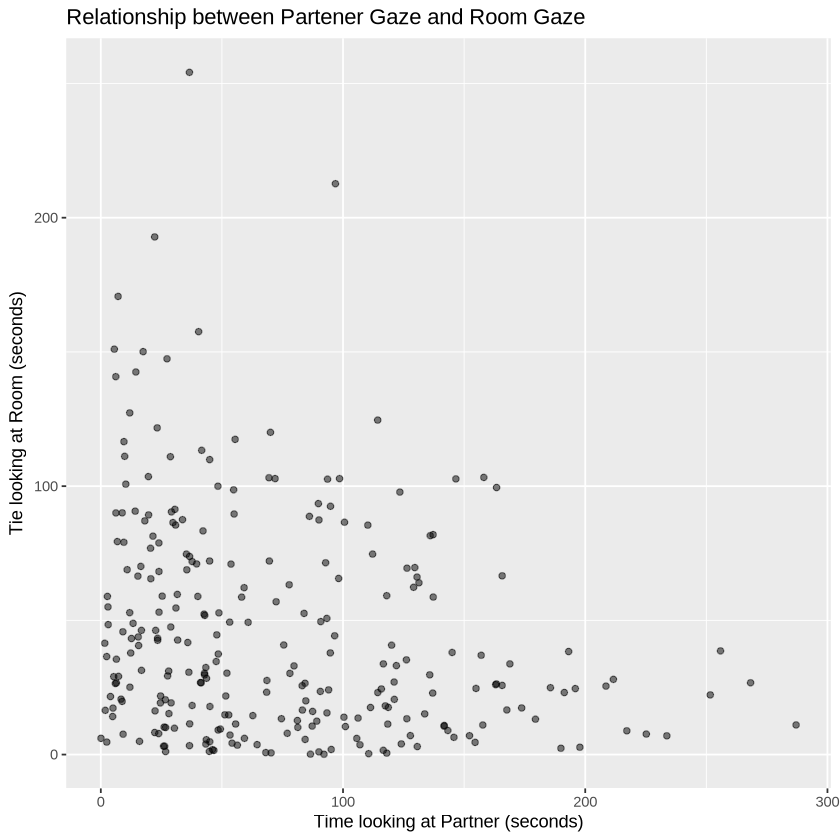

In [7]:
ggplot(BL22_E, aes(x = partner_time, y = room_time)) +
    geom_point(alpha = 0.5) + 
    ggtitle("Relationship between Partener Gaze and Room Gaze") +
    xlab("Time looking at Partner (seconds)") +
    ylab("Tie looking at Room (seconds)") 

9. partner_time, and I will use histogram to view the distribution of the variable. Histograms are ideal for showing the frequency distribution of a single numerical variable. They help us see the shape (normal, skewed, bimodal) and identifying where most observations fall.

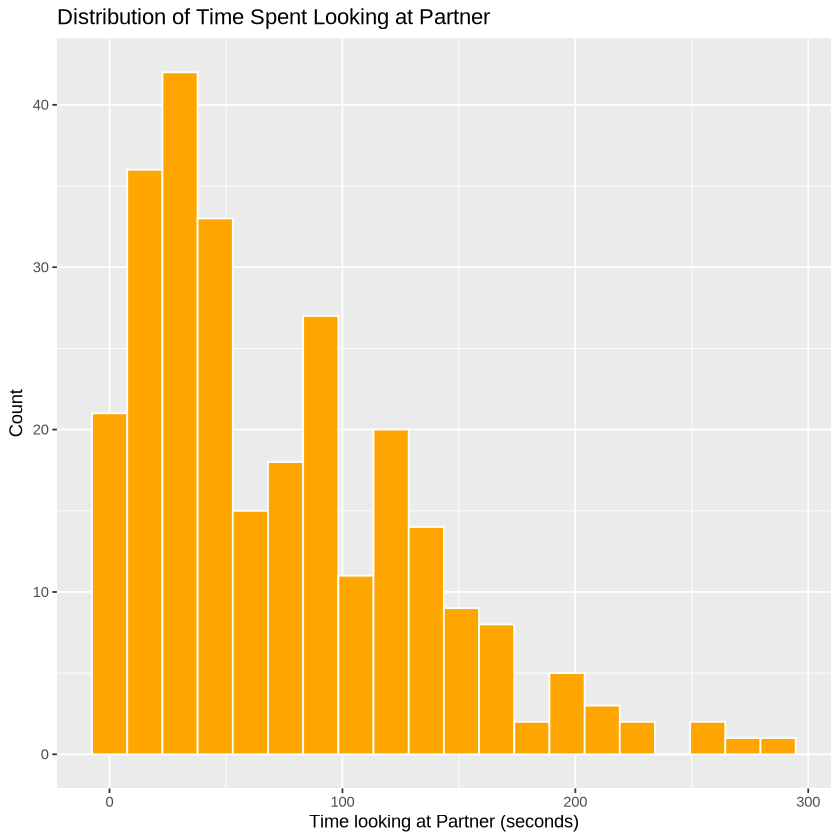

In [8]:
ggplot(BL22_E, aes(x = partner_time)) +
  geom_histogram(bins = 20, fill = "orange", color = "white") +
  ggtitle("Distribution of Time Spent Looking at Partner") +
  xlab("Time looking at Partner (seconds)") + 
  ylab("Count")

The histogram above is right skewed. This indicates that the majority of participants spent a relatively short amount of time looking at their partner, while a smaller number of participants spent a significantly longer time doing so. A typical observation falls within the range of the highest peak, which appears to be approximately 25 to 50 seconds. This suggests that it is most common for participants to spend less than a minute looking directly at their partner.

10. I chose cond and partner_time, and I will use a boxplot to visualize the relationship between these two variable. The boxplot can clearly show the median and the spread and the outliers.

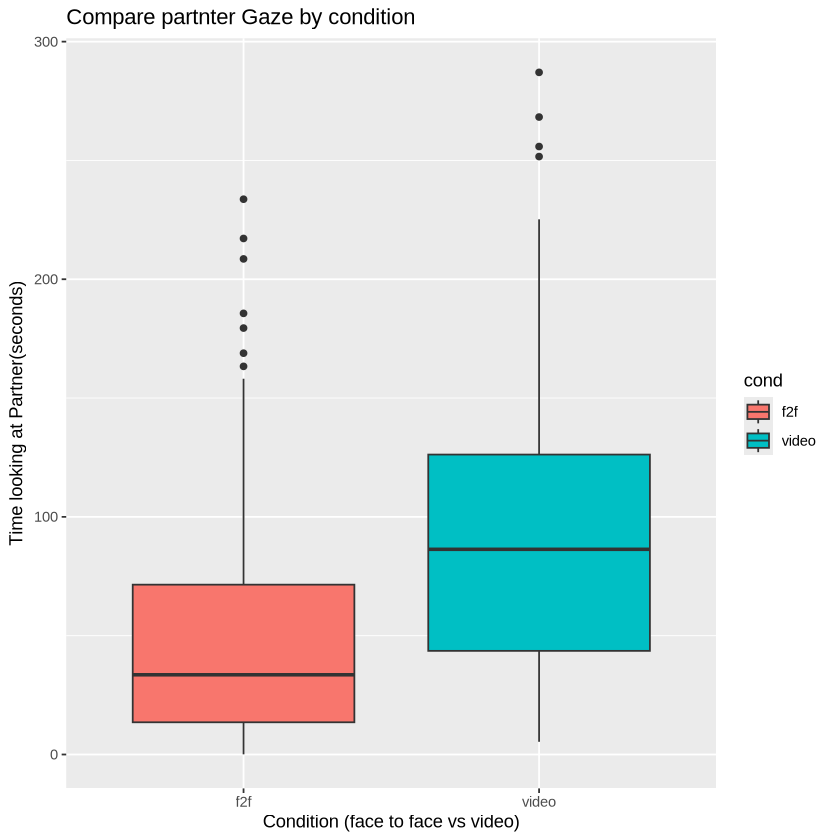

In [9]:
ggplot(BL22_E, aes(x = cond, y = partner_time, fill = cond)) + 
    geom_boxplot() + 
    ggtitle("Compare partnter Gaze by condition") + 
    xlab("Condition (face to face vs video)") + 
    ylab("Time looking at Partner(seconds)")

The median time spent looking at the partner is substantially higher for the video condition compared to the face-to-face condition. This suggests that, on average, participants in video calls spent much more time fixated on their partner. The video group shows a larger Interquartile Range (IQR), indicating more variability in how long people stared at their partners. In contrast, the face to face group has a more compressed box, suggesting that face-to-face participants consistently spent less time looking at each other. There are several outliers in the f2f group who looked at their partner significantly more than the rest of their group, but even these outliers barely reach the median level of the video group.

11. I chose cond, and I will use a bar chart to visualize the distribution of the categorical variable.

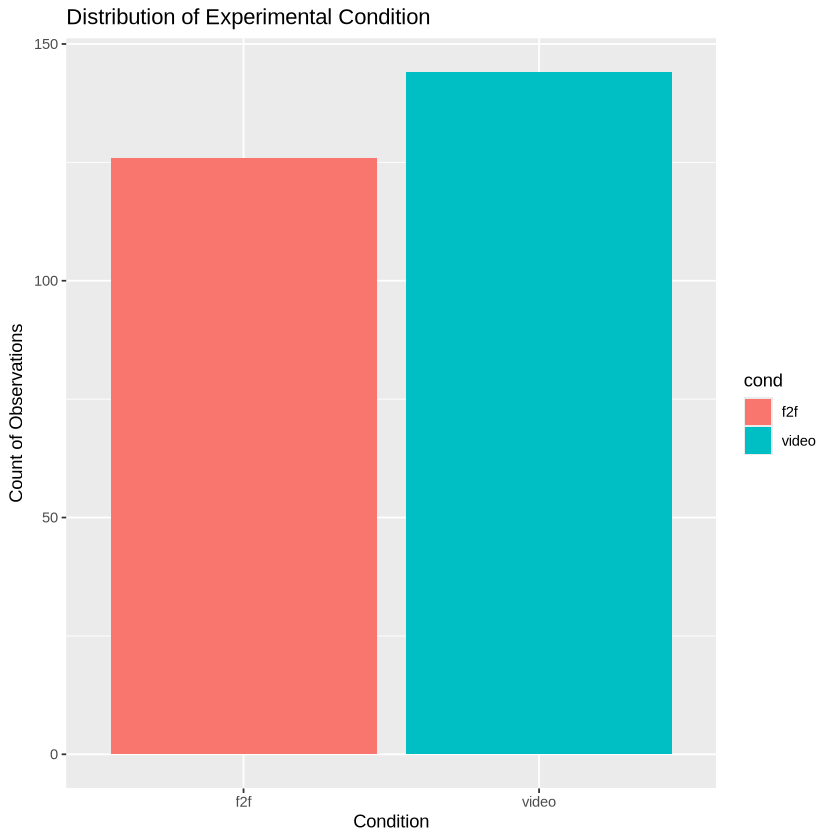

In [10]:
ggplot(BL22_E, aes(x = cond, fill = cond)) +
  geom_bar() +
  ggtitle("Distribution of Experimental Condition") + 
  xlab("Condition") + 
  ylab("Count of Observations")

Observation: The two bars are of nearly equal height. The video group has a slightly higher count compared to the f2f group, but the difference is small relative to the total sample size.
Insight: This tells us that the dataset is balanced. This balance is expected in a randomized controlled experiment where researchers typically aim to split participants evenly between control and treatment groups to ensure statistical power. I didn't see any typical value. 

# Task 4: Find summary statistics

I will choose 12 and 13

12. Variable: partner_time Measure: Median

In [11]:
BL22_E |>
  summarise(
    mean_val = mean(partner_time),
    median_val = median(partner_time)
  )

mean_val,median_val
<dbl>,<dbl>
72.84248,53.975


I selected partner_time and reported the median (approx. 57.6 seconds) as the measure of central tendency.
As observed in Task 3, the distribution of partner_time is right-skewed with a long tail extending to higher values. In skewed distributions, the mean is often pulled towards the tail by outliers, making it a poor representation of the "typical" value. The median is more robust to these extreme values and provides a more accurate reflection of the central tendency for this data.

13. Variable: cond (Condition), Statistic: Counts and Proportions

In [12]:
BL22_E |>
  count(cond) |>
  mutate(proportion = n / sum(n))

cond,n,proportion
<fct>,<int>,<dbl>
f2f,126,0.4666667
video,144,0.5333333


Summary statistics for categorical variables help us understand the composition of the sample. By using the condition data, we can find the proportion of people who choose face-to-face and video. This is highly informative because it confirms that the random assignment process was successful and the experiment is balanced, which is crucial for the validity of the study's comparisons. 

# Task 5: Develop a question

15. Does the way of communication (virtual vs. face-to-face) significantly affect the proportion of total time participants spend looking at their partner relative to other visual targets?

16. No, my question is not a predictive question, it is a inferential question, which we did a lot in stat201. Splitting the data would unnecessarily reduce the sample size and statistical power of my analysis.

17. we can add partner_gaze_prop (The proportion of attention focused on the partner).

In [13]:
BL22_E |>
  mutate(total_gaze_time = partner_time + task_time + room_time,
         partner_gaze_prop = partner_time / total_gaze_time)

id,writer,cond,partner_time,task_time,room_time,total_gaze_time,partner_gaze_prop
<fct>,<lgl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TRUE,video,84.626,193.868,20.026,298.520,0.283485194
1,FALSE,video,122.026,144.806,33.150,299.982,0.406777740
2,TRUE,video,86.122,125.630,88.740,300.492,0.286603304
2,FALSE,video,89.828,116.518,93.500,299.846,0.299580451
3,FALSE,f2f,1.632,255.816,41.480,298.928,0.005459509
4,FALSE,video,118.694,160.956,17.578,297.228,0.399336536
4,TRUE,video,24.684,245.446,21.828,291.958,0.084546407
5,TRUE,video,43.350,253.266,3.910,300.526,0.144247087
5,FALSE,video,143.276,145.010,8.976,297.262,0.481985588


I constructed this variable because looking at percentages (proportions) is much more intuitive than looking at raw seconds. For example, knowing someone spent 50% of their time looking at their partner tells us more about their focus than just knowing they spent 150 seconds. It helps us understand how they 'budgeted' their visual attention during the task.

# Task 6: Describe design

18. The authors are primarily aiming to answer a Causal question. Their goal is to determine if the medium of communication (videoconferencing versus in-person interaction) causes a change in the generation of creative ideas. They explicitly state they are providing "causal evidence" that virtual interaction hampers idea generation by testing a specific mechanism (narrowed visual and cognitive focus) . While they also use inferential statistics to generalize their findings, the core objective is to establish a cause-and-effect relationship.

19. Population of Interest: The broad population the authors are interested in is people who collaborate to generate ideas, particularly employees and teams in modern workplaces who are navigating the shift to remote or hybrid work environments. There are two samples, one is 602 university students and staff recruited from university pools in the United States. Another is 1,490 professional engineers from a large multinational telecommunications company, located across five different countries.

20. This is an controlled experiment study. The researchers did not simply observe participants in their natural work settings. Instead, they actively manipulated the independent variable there are two variables one is face to face another is video. Crucially, they used random assignment to place participants into either the virtual condition (treatment) or the in-person condition (control). This randomization ensures that any differences observed in creativity scores can be attributed to the communication method itself rather than pre-existing differences between the groups.

# Task 7: Dive into the design

21. Yes, the researchers utilized Random Assignment as their primary method to control for confounding variables. By randomly assigning pairs to either the video or in-person condition, they ensured that potential confounders—such as the participants' baseline creativity, intelligence, or technical skills—were distributed evenly across both groups. Additionally, in the laboratory experiment, the researchers controlled the physical environment by having the virtual pairs sit in "separate, identical rooms". This controlled for environmental confounders (like lighting, noise, or comfort) to ensure that the only difference between the groups was the communication modality itself.

22. The authors primarily used Convenience Sampling. The paper states they recruited participants from a "university student and staff pool" who signed up for timeslots in an online portal. The participants were engineers recruited by their company to participate in a "voluntary workshop. And in my opinion, the reason they use they chose this method is using a university pool is cost-effective and efficient for lab experiments. For the field experiment, recruiting engineers from a specific company allowed them to test their hypothesis on "domain experts" in a real-world setting, which increases the external validity of their findings for the target population.

23. Yes, there are potential sources of sampling bias, specifically voluntary response bias and convenience sampling.


    Voluntary Response Bias: In both the laboratory and field experiments, participation was voluntary. The authors acknowledge that in the lab study, students who signed up might be "more well-adjusted" or "more social" than the average student. Similarly, in the field experiment, engineers voluntarily joined an "intrapreneurship" workshop, meaning they might be more "motivated to perform well" or interested in innovation than those who did not attend.


    Effect on Conclusions: this sampling bias limits the external validity. For example, if the participants are exceptionally tech-savvy, they might navigate videoconferencing better than the general public, potentially underestimating the negative effect of virtual communication for less tech-literate populations.

# Task 8: Now it is your turn

24. If I were to design this study, I would change the design method. Instead of assigning different people to the "Video" and "In-Person" groups, I would have every pair perform both tasks: one brainstorming session in person and a second session via video.

    Why I would do this: Creativity is highly dependent on the "chemistry" between two partners. If I am having a talk with a person I like or have same personality, I will become more talktive and more creative. In the current design, if the "In-Person" group just happened to have more naturally creative pairs by luck, it could skew the results. A within-subjects design removes this variability because each pair acts as their own control.

    The reason they not chose this method: The authors likely avoided this because participants might get better at brainstorming during the second task or get tired. Personally, if I need to focus and communicate creativly in one meeting, I may feel tired for the following talk. So maybe my result may get affected by the order of the talk.

    Limitations of my proposed approach: The main challenge would be counterbalancing. I would need to ensure that half the group does "In-Person" first and the other half does "Video" first to cancel out any learning effects. Even then, if the first session is mentally exhausting, the data for the second session might be an unavoidlable effect.